#some imports


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#cleaning data and remove duplicates

In [2]:
path="/content/sample_data/Job titles and industries.csv"
data = pd.read_csv(path)
print("The duplicated data = ",data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("The duplicated data = ",data.duplicated().sum())
data = data.rename(columns={'job title': 'job_title'})
data.head()


The duplicated data =  4618
The duplicated data =  0


,job_title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


# plot industry counts after drop duplicates

The classes after dropping the duplicated data: 
 IT             1529
Marketing      1203
Education       973
Accountancy     263
Name: industry, dtype: int64


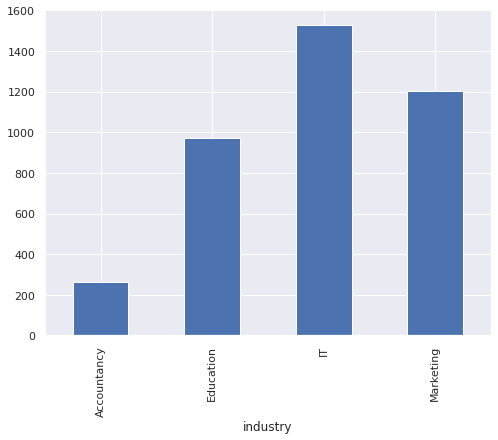

In [3]:
print("The classes after dropping the duplicated data: \n",data.industry.value_counts())
fig = plt.figure(figsize=(8,6))
data.groupby('industry').job_title.count().plot.bar(ylim=0)
plt.show()

# Suffle the data 




In [4]:
from sklearn.utils import shuffle
data = shuffle(data,random_state=42)
x=data.job_title
y=data.industry


# Split the data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics
categories = ['Accountancy','Education','IT','Marketing']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test.value_counts()



IT             306
Marketing      241
Education      187
Accountancy     60
Name: industry, dtype: int64

#Model pipeline

In [6]:
from sklearn.svm import LinearSVC
model = make_pipeline(TfidfVectorizer(), LinearSVC(class_weight="balanced"))

In [7]:
model.fit(X_train, y_train)
labels = model.predict(X_test)
print(model.score(y_test,labels))
print(metrics.classification_report(y_test, labels))

0.8929471032745592
              precision    recall  f1-score   support

 Accountancy       0.80      0.87      0.83        60
   Education       0.95      0.89      0.92       187
          IT       0.89      0.92      0.91       306
   Marketing       0.88      0.86      0.87       241

    accuracy                           0.89       794
   macro avg       0.88      0.89      0.88       794
weighted avg       0.89      0.89      0.89       794



#confusion_matrix

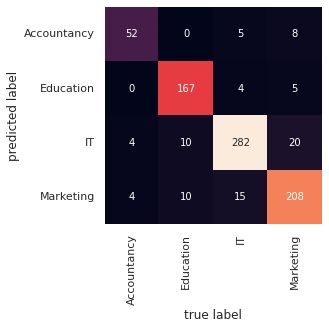

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
model.predict(["head of it services"])


array(['IT'], dtype=object)

#make model .joblib to reuse it

In [10]:
from joblib import dump,load
dump(model,"model.joblib")

['model.joblib']